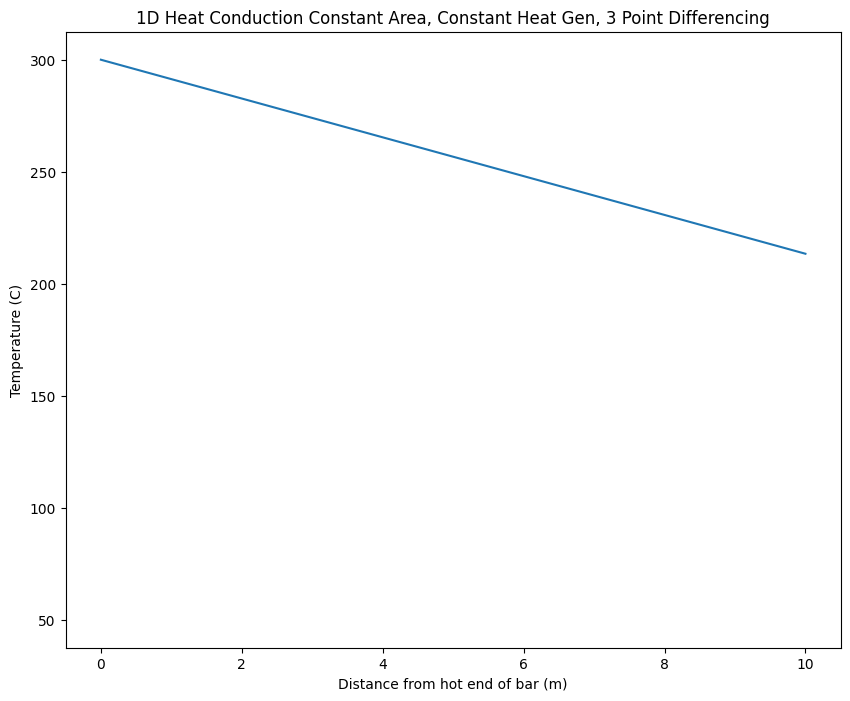

In [28]:
# importing modules for matrix and plotting
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

# defining material properties
LBar   =         10     # length of bar: meters
kCond  =         250    # thermal conductivity: W/m/C
hConv  =         14      # convection coefficient: W/m^2/C
xsInit =         0.1    # initial cross-section area: m^2
xsFin  =         0.05   # final cross-section area: m^2
Tair   =         20     # air temp: Celsius
n      =         5     # number of sections
sHeat  =         2      # heat gen per unit length: W/m
sHeatF =         10     # heat gen variable by length: W/m
# boundary condition
Tinit  =         300    # initial bar temp: C

# 3 point, constant area, constant heat gen

dx = LBar/(n)
dx2 = dx*dx

# setting up LHS matrix
LM = np.zeros((n,n))

# defining initial value
LM[0,0]  = 1
LM[-1,-1]  = 1


# defining 2nd row
LM[1,0]  =  1
LM[1,1]  = -2
LM[1,2]  =  1

# defining 2nd to last row
LM[-2,-1]  =  1
LM[-2,-2]  = -2
LM[-2,-3]  =  1

# for loop
for i in range(2, n-2):
    LM[i,i-1] =  1
    LM[i,i]   = -2
    LM[i,i+1] =  1


# defining the last row
LM[-1,-1] = 1 + (hConv *dx/kCond)
LM[-1,-2] = -1
#variation of cross sectional area

# array of steps for area
Area = np.linspace(xsInit, xsFin, n-1)



# matrix b

b = np.full(n, ((-sHeat/(kCond)*(xsInit))*(dx2)))
b[0]  = 300
b[-1] = (hConv*dx/kCond)*Tair


# solve the linear equation
vectors3pconstant = np.linalg.solve(LM, b)


xvals = np.linspace(0, 10, n)


plt.figure(figsize=(10,8))
plt.plot(xvals, vectors3pconstant)
plt.plot(5, 50)

plt.title("1D Heat Conduction Constant Area, Constant Heat Gen, 3 Point Differencing")
plt.xlabel('Distance from hot end of bar (m)')
plt.ylabel('Temperature (C)')
plt.show()

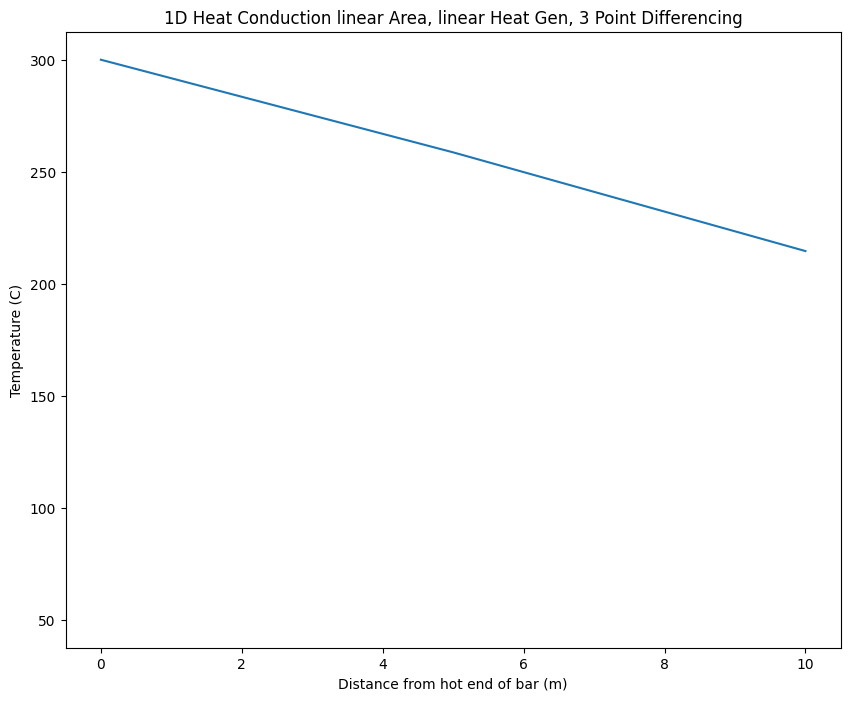

In [29]:
# 3 point, linear area, linear heat gen

#variation of cross sectional area
# array of steps for area
Area = np.linspace(xsInit, xsFin, n-1)

# differential lengths
dx = LBar/(n)
dx2 = dx*dx

# heat generation as a linear function
HeatGen = np.linspace(sHeat, sHeatF, n-1)

# setting up LHS matrix
LM = np.zeros((n,n))

# defining initial value
LM[0,0]  = 1
LM[-1,-1]  = 1


# defining 2nd row
LM[1,0]  =  1
LM[1,1]  = -2
LM[1,2]  =  1

# defining 2nd to last row
LM[-2,-1]  =  1
LM[-2,-2]  = -2
LM[-2,-3]  =  1

# creating our RHS matrix
b = np.full(n, 0)

# for loop for different areas
for i in range(2, n-2):
    # creating the Left side matrix for rows 2 and beyond
    # including linear x-sectional area function
    LM[i,i-1] =  1 - 0.25*(Area[i+1]-Area[i-1])
    LM[i,i]   = -2
    LM[i,i+1] =  1 + 0.25*(Area[i+1]-Area[i-1])
    # creating our right side matrix
    # including linear x-sectional area function
    b[i] = (-HeatGen[i]/(kCond*Area[i]))*(dx2)

# defining the last row
LM[-1,-1] = 1 + (hConv *dx/kCond)
LM[-1,-2] = -1

# matrix b

b[0]  = 300
b[1]  = ((-HeatGen[0]/(kCond))*(dx2))
b[-2]  = ((-HeatGen[-1]/(kCond))*(dx2))
b[-1] = (hConv*dx/kCond)*Tair


# solve the linear equation
vectors3plinear = np.linalg.solve(LM, b)

xvals = np.linspace(0, 10, n)

plt.figure(figsize=(10,8))
plt.plot(xvals, vectors3plinear)
plt.plot(5, 50)
plt.title("1D Heat Conduction linear Area, linear Heat Gen, 3 Point Differencing")
plt.xlabel('Distance from hot end of bar (m)')
plt.ylabel('Temperature (C)')
plt.show()

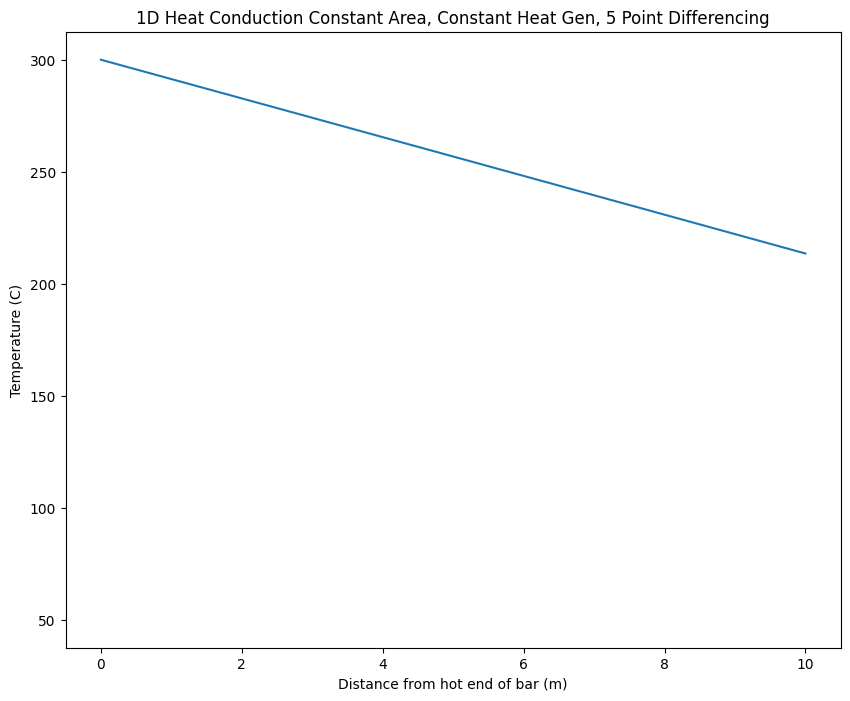

In [36]:
# 5-point, constant area( A(x)), constant heat gen( s(x))

dx = LBar/(n)
dx2 = dx*dx

# setting up LHS matrix
LM = np.zeros((n,n))

# defining initial value
LM[0,0]  = 1
LM[-1,-1]  = 1


# defining 2nd row
LM[1,0]  =  1
LM[1,1]  = -2
LM[1,2]  =  1

# defining 2nd to last row
LM[-2,-1]  =  1
LM[-2,-2]  = -2
LM[-2,-3]  =  1

# for loop
for i in range(2, n-2):
    LM[i,i-2] = -1
    LM[i,i-1] =  16
    LM[i,i]   = -30
    LM[i,i+1] =  16
    LM[i,i+2] = -1

# defining the last row
LM[-1,-1] = 1 + (hConv *dx/kCond)
LM[-1,-2] = -1
#variation of cross sectional area

# array of steps for area
Area = np.linspace(xsInit, xsFin, n-1)



# matrix b
#b = np.full(n, ((sHeat/(kCond*xsInit)))*12*(dx**2))
### testing different b
b = np.full(n, ((-sHeat/(kCond)*(xsInit))*(12*dx2)))
b[0]  = 300
b[-1] = (hConv*dx/kCond)*Tair


# solve the linear equation
vectors5pconstant = np.linalg.solve(LM, b)


xvals = np.linspace(0, 10, n)

plt.figure(figsize=(10,8))
plt.plot(xvals, vectors5pconstant)
plt.plot(5, 50)

plt.title("1D Heat Conduction Constant Area, Constant Heat Gen, 5 Point Differencing")
plt.xlabel('Distance from hot end of bar (m)')
plt.ylabel('Temperature (C)')
plt.show()

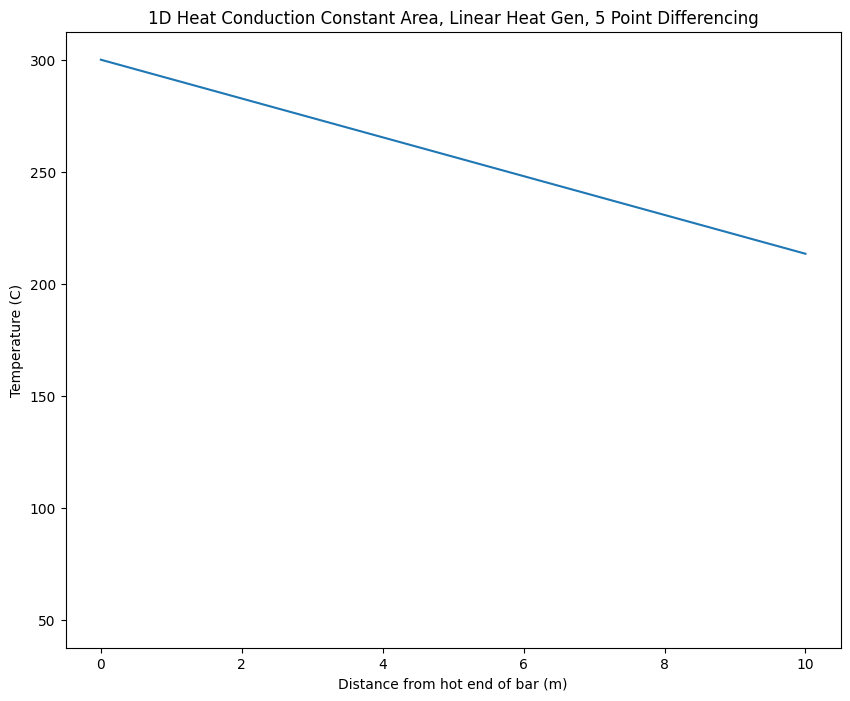

In [35]:
# 5-point, constant area( A(x)), linear heat gen( s(x))

dx = LBar/(n)
dx2 = dx*dx

# setting up LHS matrix
LM = np.zeros((n,n))

# defining initial value
LM[0,0]  = 1
LM[-1,-1]  = 1


# defining 2nd row
LM[1,0]  =  1
LM[1,1]  = -2
LM[1,2]  =  1

# defining 2nd to last row
LM[-2,-1]  =  1
LM[-2,-2]  = -2
LM[-2,-3]  =  1

# for loop
for i in range(2, n-2):
    LM[i,i-2] = -1
    LM[i,i-1] =  16
    LM[i,i]   = -30
    LM[i,i+1] =  16
    LM[i,i+2] = -1
    # Heat gen linear application
    b[i] = (-HeatGen[i]/(kCond*xsInit))*12*(dx2)

# defining the last row
LM[-1,-1] = 1 + (hConv *dx/kCond)
LM[-1,-2] = -1
#variation of cross sectional area

# array of steps for area
Area = np.linspace(xsInit, xsFin, n-1)



# matrix b
#b = np.full(n, ((sHeat/(kCond*xsInit)))*12*(dx**2))
### testing different b
b = np.full(n, ((-sHeat/(kCond))*(dx2)))
b[0]  = 300
b[-1] = (hConv*dx/kCond)*Tair


# solve the linear equation
vectors5pconstantlin = np.linalg.solve(LM, b)


xvals = np.linspace(0, 10, n)

plt.figure(figsize=(10,8))
plt.plot(xvals, vectors5pconstant)
plt.plot(5, 50)

plt.title("1D Heat Conduction Constant Area, Linear Heat Gen, 5 Point Differencing")
plt.xlabel('Distance from hot end of bar (m)')
plt.ylabel('Temperature (C)')
plt.show() 

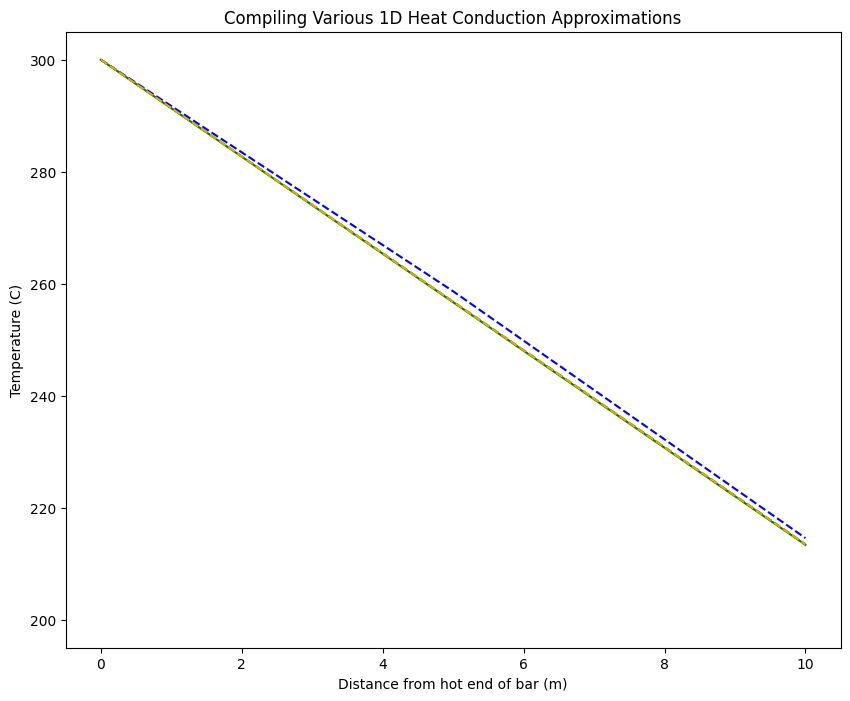

In [46]:
# grouping of all plots
plt.figure(figsize=(10,8))
plt.plot(xvals, vectors3pconstant, '-g')
plt.plot(xvals, vectors3plinear, '--b')
plt.plot(xvals, vectors5pconstant, '--r')
plt.plot(xvals, vectors5pconstantlin, '--y')
plt.plot(5, 200)

plt.title("Compiling Various 1D Heat Conduction Approximations")
plt.xlabel('Distance from hot end of bar (m)')
plt.ylabel('Temperature (C)')
plt.show() 